In [1]:
import numpy as np
import pandas as pd
import datetime
import glob 
import string
from collections import Counter
import time
from stemming.porter2 import stem
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

In [2]:
# Start the matlab engine. Requires a matlab installation in the system 
# and installation of the matlab API, see https://www.mathworks.com/help/matlab/matlab_external/install-the-matlab-engine-for-python.html
import matlab.engine
eng = matlab.engine.start_matlab()

In [3]:
# create the bag of words
# do not do any preprocessing on the words, except setting to lower case and stripping whitespaces
def preprocess(pathlabel):
    counts = []
    keys = set()

    for i,path in enumerate(pathlabel[0]):
        #if(i %100 == 0):
        #    print("Reached %s"%i)
        doc = open(path, "r", errors='ignore').readlines()
        text = " ".join(doc)
        prep = text.translate(str.maketrans('', '', string.punctuation))
        words = [x.strip().lower() for x in prep.split()] # what other preprocessing? Maybe check out https://machinelearningmastery.com/gentle-introduction-bag-words-model/
        count = Counter(words)
        #counts[i] = count
        counts.append(dict(count))
        #keys = keys.union(count.keys())

    #keys = list(keys)
    #len(keys)
    
    matrix = pd.DataFrame(counts)
    matrix = matrix.fillna(0)
    matrix = matrix.astype(int)
    
    return matrix

In [4]:
# create the bag of words, but have some more preprocessing
# stem the words, set to lower case, strip whitespace
# ignore words with less than 4 occurences
# ignore words that contain digits
# ignore words with less than 3 characters and more than 15. 
def more_preprocess(pathlabel):
    counts = []
    keys = set()

    for i,path in enumerate(pathlabel[0]):
        #if(i %100 == 0):
        #    print("Reached %s"%i)
        doc = open(path, "r", errors='ignore').readlines()
        text = " ".join(doc)
        prep = text.translate(str.maketrans('', '', string.punctuation))
        words = [stem(x.strip().lower()) for x in prep.split()] # what other preprocessing? Maybe check out https://machinelearningmastery.com/gentle-introduction-bag-words-model/
        #words = [x.strip().lower() for x in prep.split()] # what other preprocessing? Maybe check out https://machinelearningmastery.com/gentle-introduction-bag-words-model/
        count = Counter(words)
        #counts[i] = count
        counts.append(dict(count))
        #keys = keys.union(count.keys())

    #keys = list(keys)
    #len(keys)
    
    matrix = pd.DataFrame(counts)
    matrix = matrix.fillna(0)
    matrix = matrix.astype(int)
    
    # keep only words showing up at least 4 times in total
    matrix = matrix[matrix.columns[matrix.sum() >= 4]]
    # keeps words that do not contain digits
    matrix = matrix[matrix.columns[[not any(char.isdigit() for char in x) for x in matrix.columns]]]
    # keep words with length of at least 3 and max 15
    matrix = matrix[matrix.columns[[len(x) >= 3 and len(x) <= 15 for x in matrix.columns]]]
    
    return matrix

In [5]:
# create the bag of words, but have some light preprocessing
# stem the words and ignore words with digits 
def mid_preprocess(pathlabel):
    counts = []
    keys = set()

    for i,path in enumerate(pathlabel[0]):
        #if(i %100 == 0):
        #    print("Reached %s"%i)
        doc = open(path, "r", errors='ignore').readlines()
        text = " ".join(doc)
        prep = text.translate(str.maketrans('', '', string.punctuation))
        words = [stem(x.strip().lower()) for x in prep.split()] # what other preprocessing? Maybe check out https://machinelearningmastery.com/gentle-introduction-bag-words-model/
        #words = [x.strip().lower() for x in prep.split()] # what other preprocessing? Maybe check out https://machinelearningmastery.com/gentle-introduction-bag-words-model/
        count = Counter(words)
        #counts[i] = count
        counts.append(dict(count))
        #keys = keys.union(count.keys())

    #keys = list(keys)
    #len(keys)
    
    matrix = pd.DataFrame(counts)
    matrix = matrix.fillna(0)
    matrix = matrix.astype(int)
    
    # keep only words showing up at least 4 times in total
    #matrix = matrix[matrix.columns[matrix.sum() >= 4]]
    # keeps words that do not contain digits
    matrix = matrix[matrix.columns[[not any(char.isdigit() for char in x) for x in matrix.columns]]]
    # keep words with length of at least 3 and max 15
    #matrix = matrix[matrix.columns[[len(x) >= 3 and len(x) <= 15 for x in matrix.columns]]]
    
    return matrix

In [6]:
def TONMF(matrixfilename): 
    k = 20.0 
    alpha = 10.0
    beta = 1.0 # I have no clue how much shoud beta be, in the paper, they say that it does not have any impact
    res = eng.textoutliersfromfile(matrixfilename, k, alpha, beta)

In [7]:
# A set of 10 benchmarks on RCV20, as specified in the paper 
#benchmark = "bm/rcv20/*.data"
# A set of 10 benchmarks on Reuters, as specified in the paper 
benchmark = "bm/reuters/*.data"

# Other benchmarks (data is not hostet in the git repo at the moment )
#benchmark = "/home/fouchee/git/outlier-documents/odt/dblp/bm/*.data"
#benchmark = "/home/fouchee/git/outlier-documents/odt/nyt/bm/*.data"

2019-10-05 18:00:22.220384 - Starting with bm/reuters/reuters.6.data
2019-10-05 18:01:21.469101 - Done preprocessing ! (6407,4654)
2019-10-05 18:01:35.820433 - Running the Matlab code
2019-10-05 18:02:43.077050 - Done, now scoring...
2019-10-05 18:02:53.731852 - Done ! Now reporting...


<IPython.core.display.Javascript object>


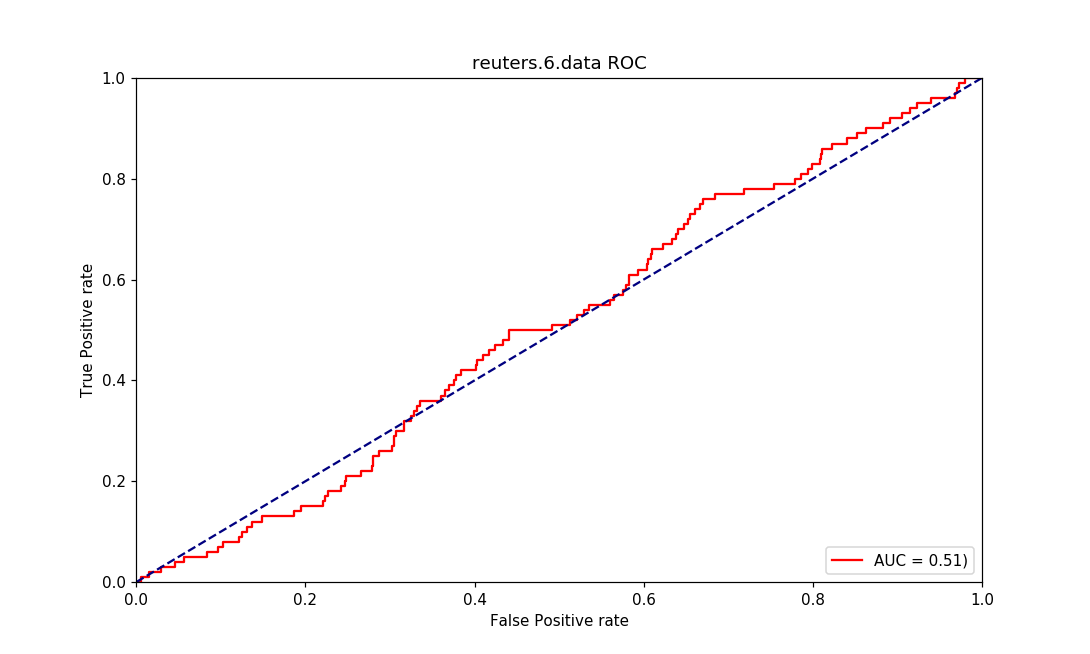

<IPython.core.display.Javascript object>


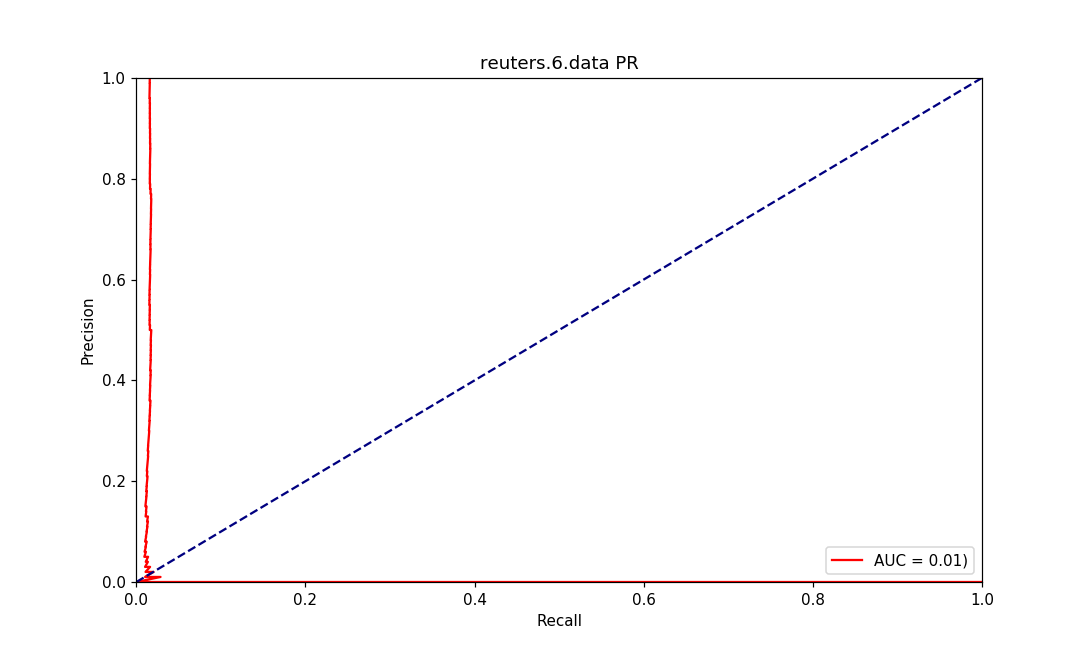

2019-10-05 18:02:54.137246 - Starting with bm/reuters/reuters.9.data
2019-10-05 18:03:46.966131 - Done preprocessing ! (6407,4656)
2019-10-05 18:04:01.611694 - Running the Matlab code
2019-10-05 18:04:57.474380 - Done, now scoring...
2019-10-05 18:05:07.913634 - Done ! Now reporting...


<IPython.core.display.Javascript object>


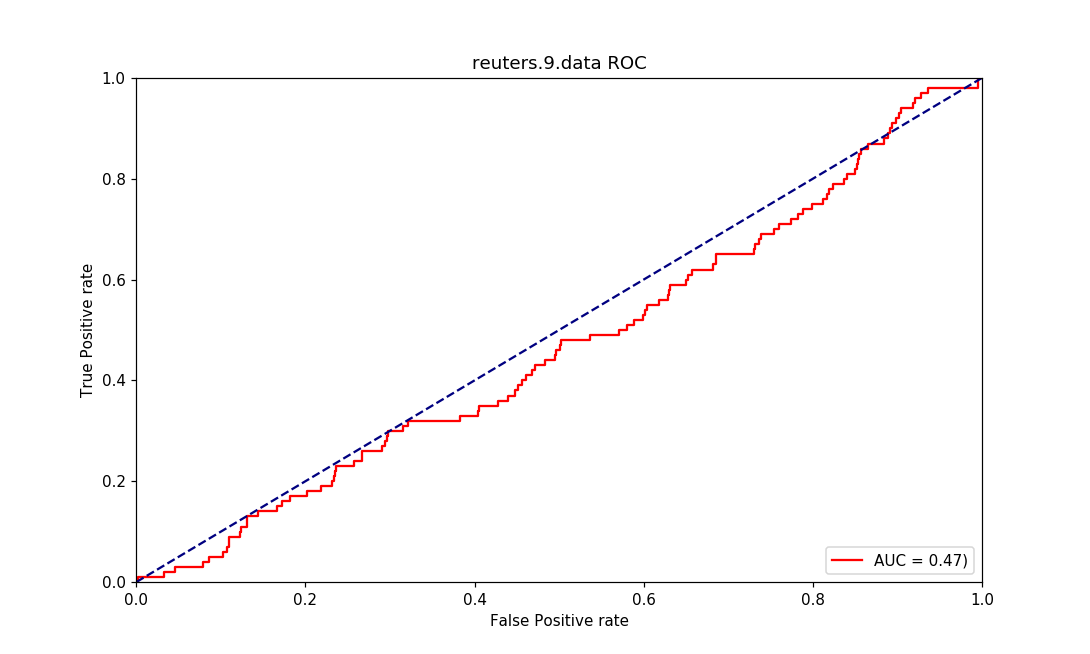

<IPython.core.display.Javascript object>


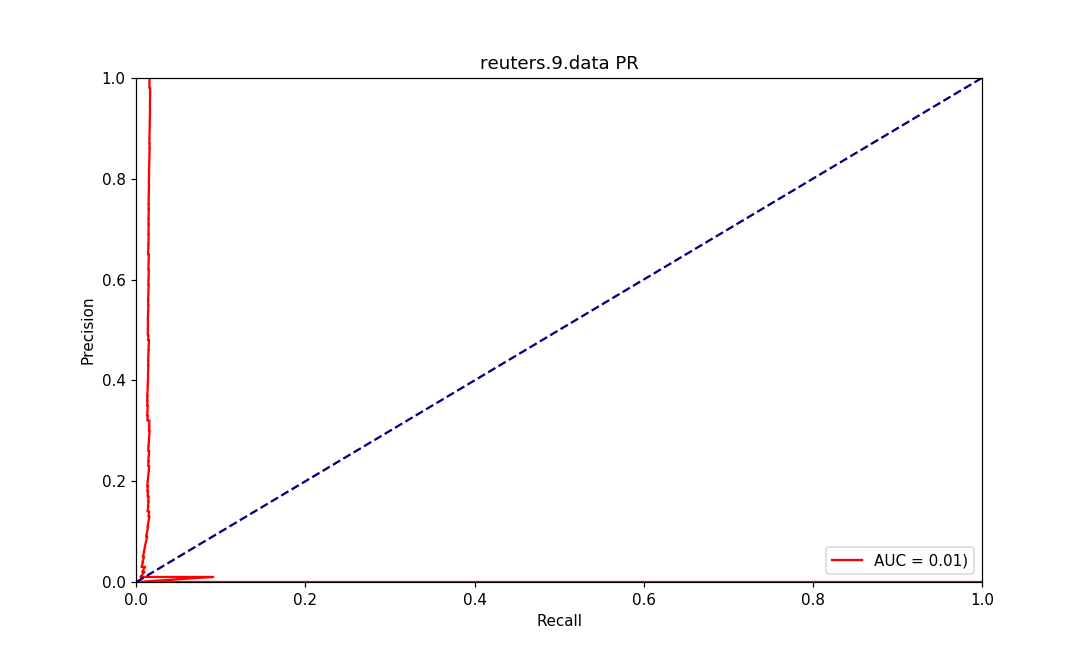

2019-10-05 18:05:08.364114 - Starting with bm/reuters/reuters.2.data
2019-10-05 18:06:06.141704 - Done preprocessing ! (6407,4653)
2019-10-05 18:06:20.341762 - Running the Matlab code
2019-10-05 18:07:16.718806 - Done, now scoring...
2019-10-05 18:07:26.648181 - Done ! Now reporting...


<IPython.core.display.Javascript object>


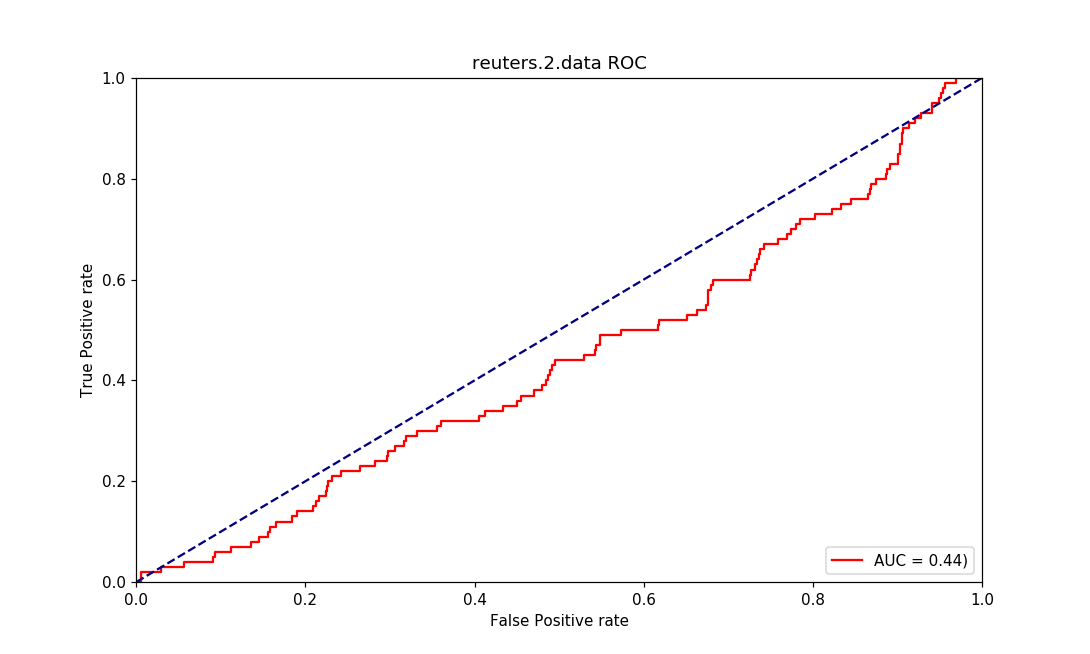

<IPython.core.display.Javascript object>


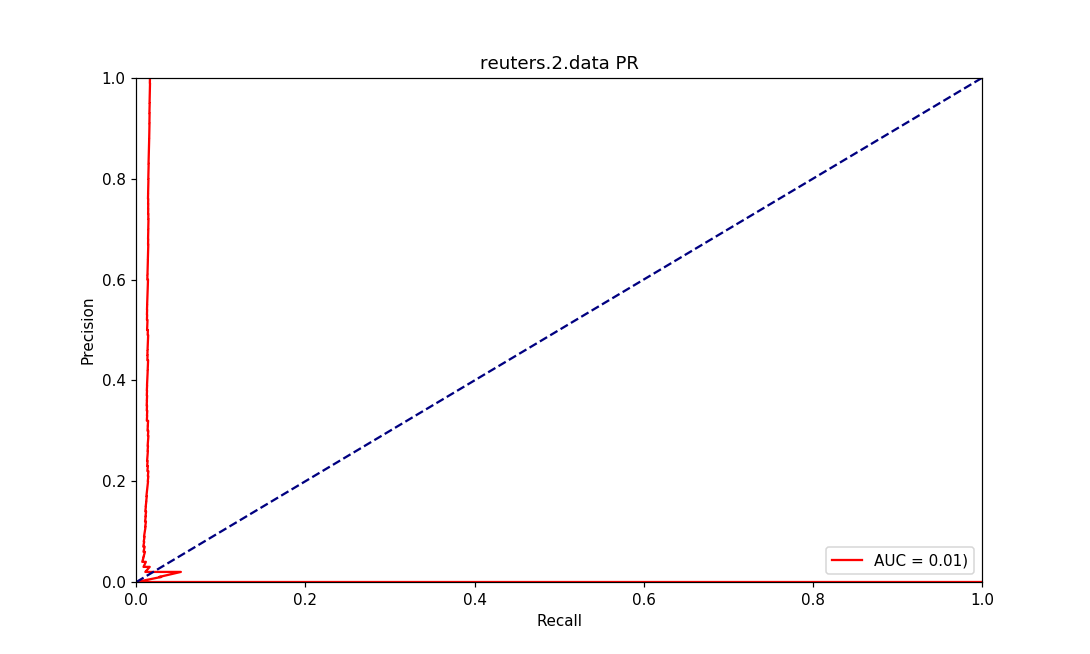

2019-10-05 18:07:26.901268 - Starting with bm/reuters/reuters.10.data
2019-10-05 18:08:28.605637 - Done preprocessing ! (6407,4636)
2019-10-05 18:08:43.422364 - Running the Matlab code
2019-10-05 18:09:41.846382 - Done, now scoring...
2019-10-05 18:09:52.396881 - Done ! Now reporting...


<IPython.core.display.Javascript object>


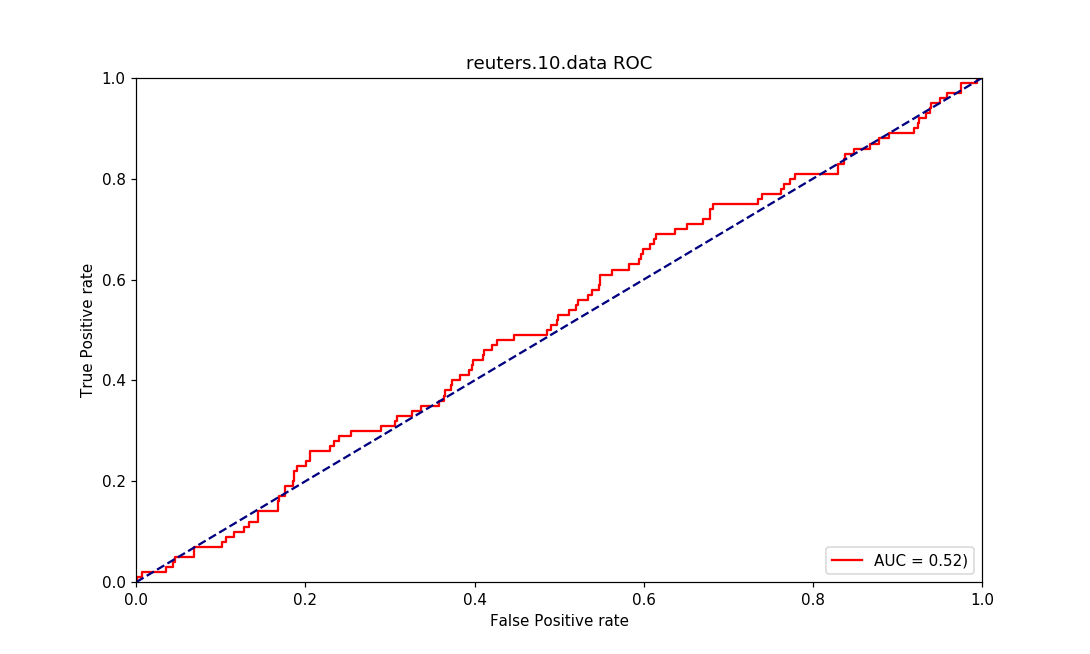

<IPython.core.display.Javascript object>


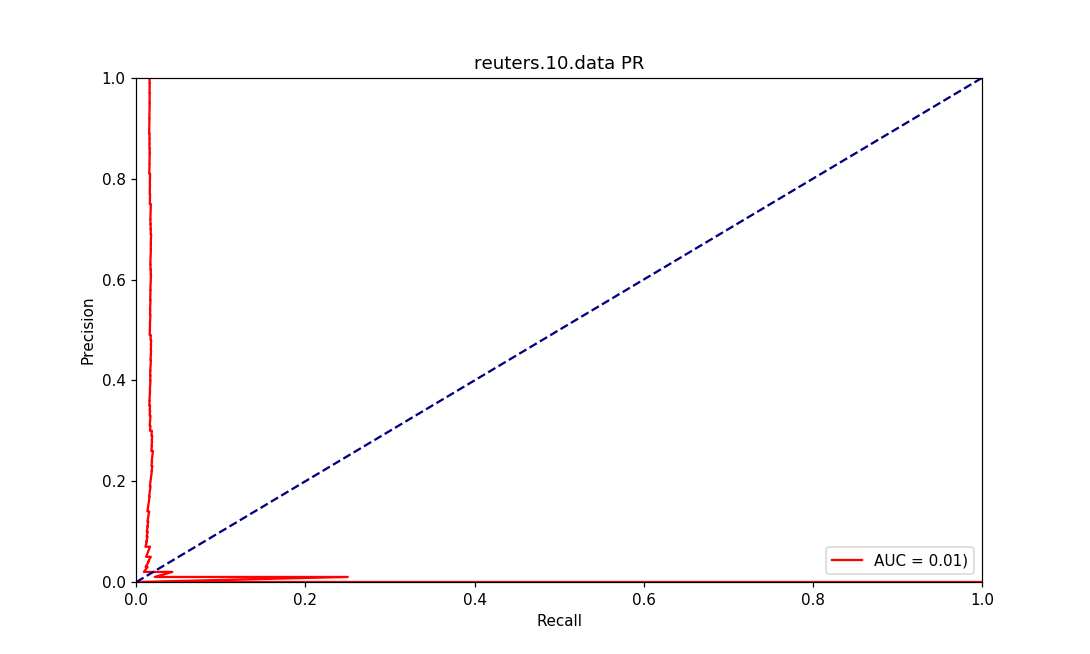

2019-10-05 18:09:52.919356 - Starting with bm/reuters/reuters.8.data
2019-10-05 18:10:58.854693 - Done preprocessing ! (6407,4669)
2019-10-05 18:11:13.019675 - Running the Matlab code
2019-10-05 18:12:05.237077 - Done, now scoring...
2019-10-05 18:12:14.882170 - Done ! Now reporting...


<IPython.core.display.Javascript object>


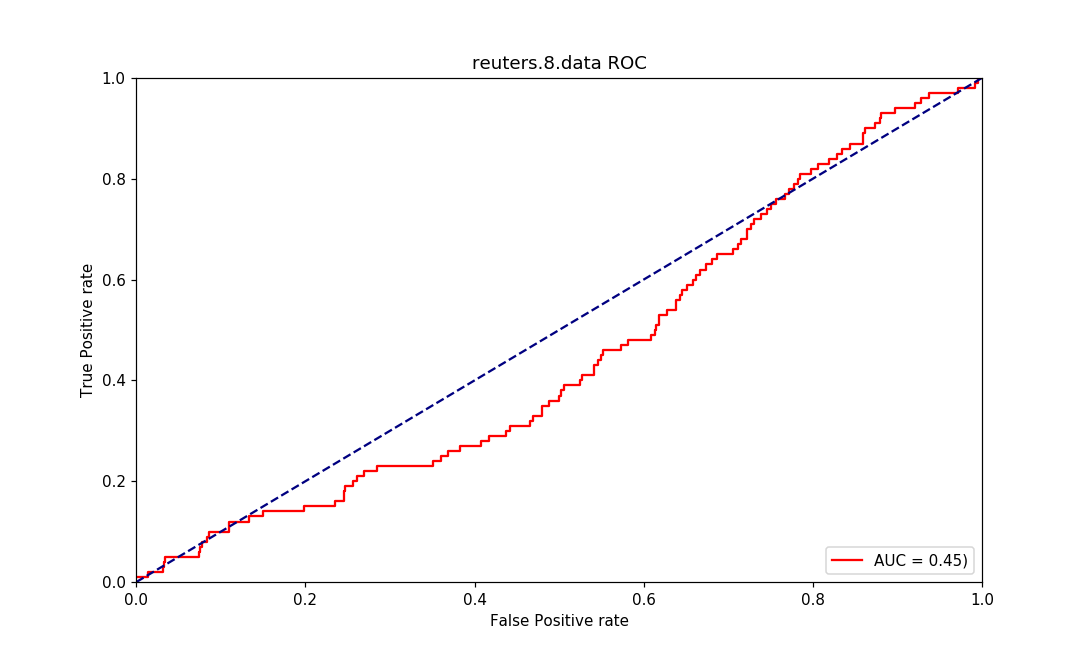

<IPython.core.display.Javascript object>


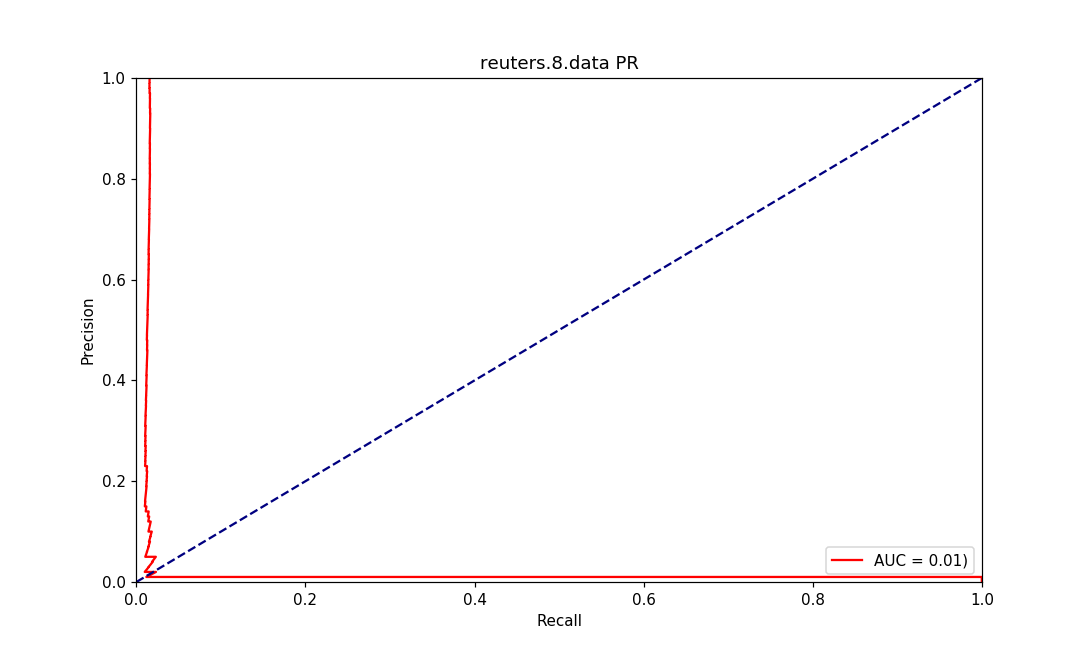

2019-10-05 18:12:15.178102 - Starting with bm/reuters/reuters.1.data
2019-10-05 18:13:10.668685 - Done preprocessing ! (6407,4645)
2019-10-05 18:13:34.080140 - Running the Matlab code
2019-10-05 18:15:02.429373 - Done, now scoring...
2019-10-05 18:15:16.551351 - Done ! Now reporting...


<IPython.core.display.Javascript object>


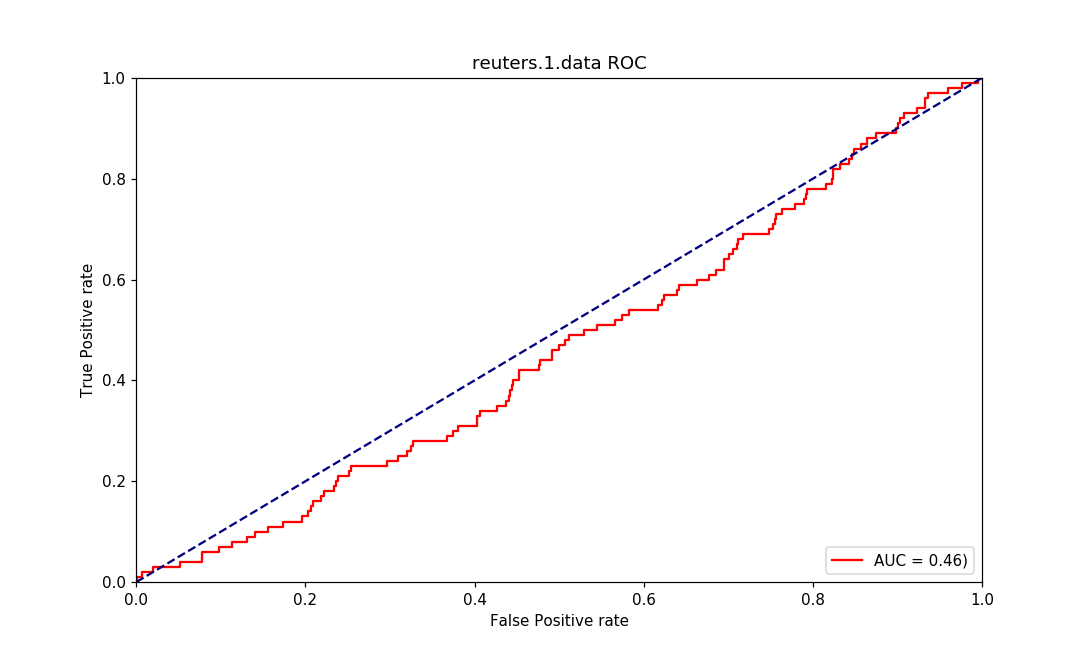

<IPython.core.display.Javascript object>


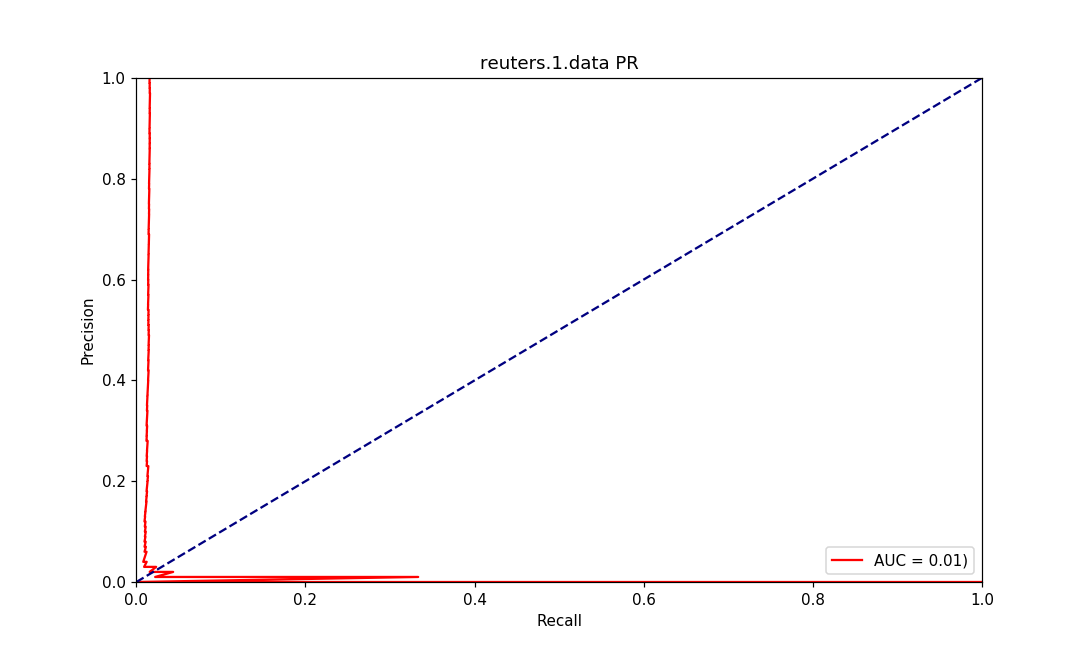

2019-10-05 18:15:16.873348 - Starting with bm/reuters/reuters.4.data
2019-10-05 18:17:24.861889 - Done preprocessing ! (6407,4653)
2019-10-05 18:17:39.419350 - Running the Matlab code
2019-10-05 18:18:40.745418 - Done, now scoring...
2019-10-05 18:18:51.385055 - Done ! Now reporting...


<IPython.core.display.Javascript object>


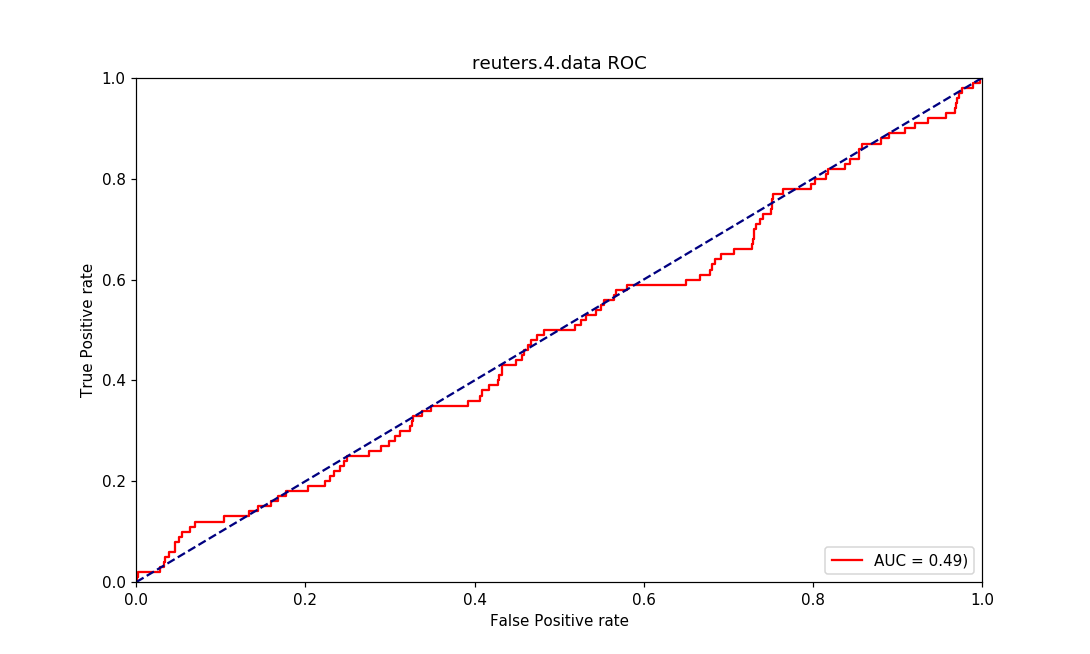

<IPython.core.display.Javascript object>


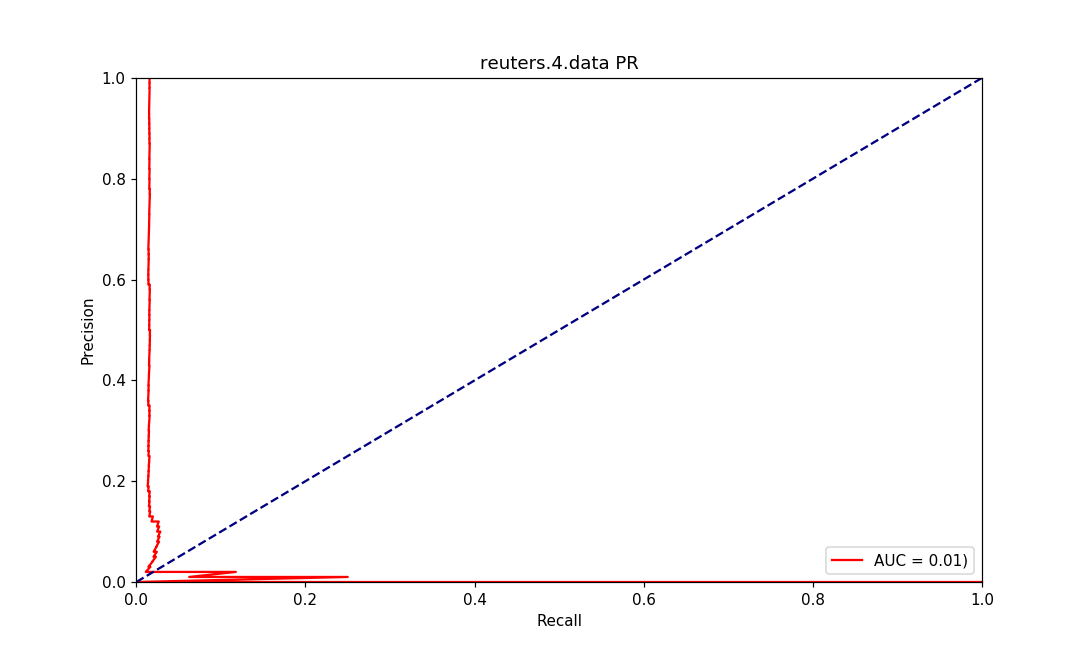

2019-10-05 18:18:51.798477 - Starting with bm/reuters/reuters.3.data
2019-10-05 18:20:04.624146 - Done preprocessing ! (6407,4651)
2019-10-05 18:20:19.681356 - Running the Matlab code
2019-10-05 18:21:17.057359 - Done, now scoring...
2019-10-05 18:21:26.927837 - Done ! Now reporting...


<IPython.core.display.Javascript object>


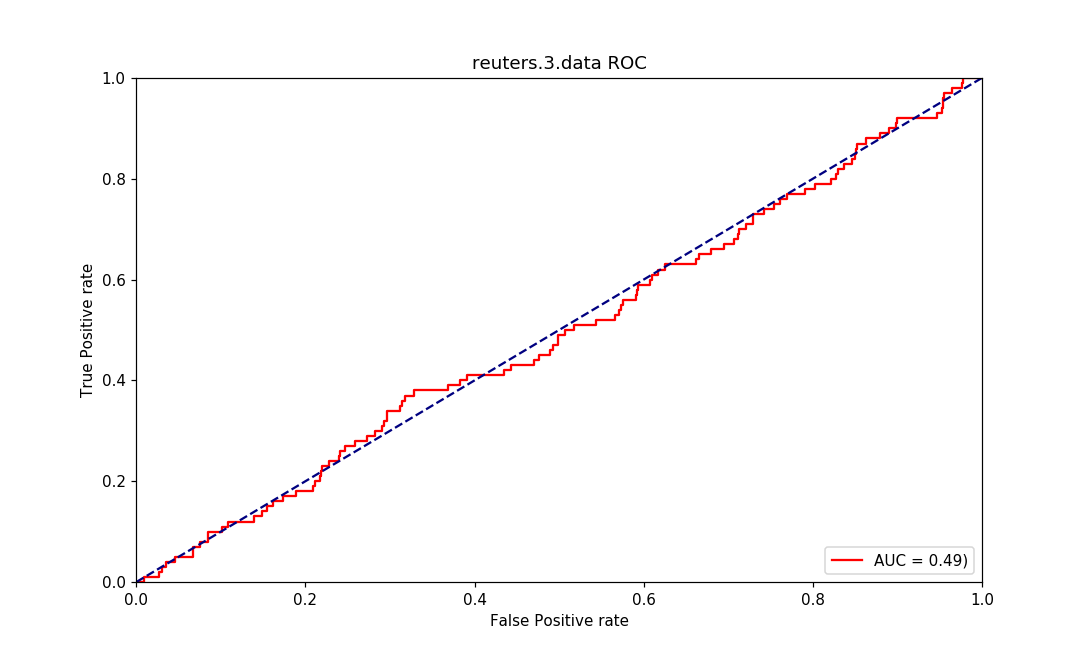

<IPython.core.display.Javascript object>


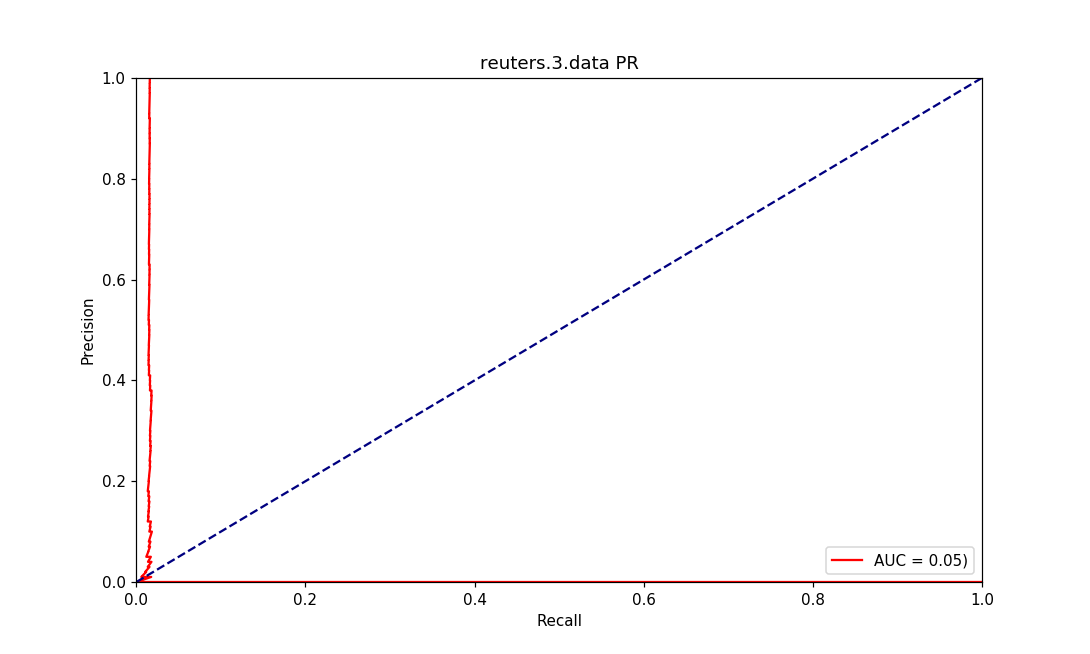

2019-10-05 18:21:27.219709 - Starting with bm/reuters/reuters.7.data
2019-10-05 18:22:30.121953 - Done preprocessing ! (6407,4664)
2019-10-05 18:22:51.465277 - Running the Matlab code
2019-10-05 18:23:53.816739 - Done, now scoring...
2019-10-05 18:24:03.972763 - Done ! Now reporting...


<IPython.core.display.Javascript object>


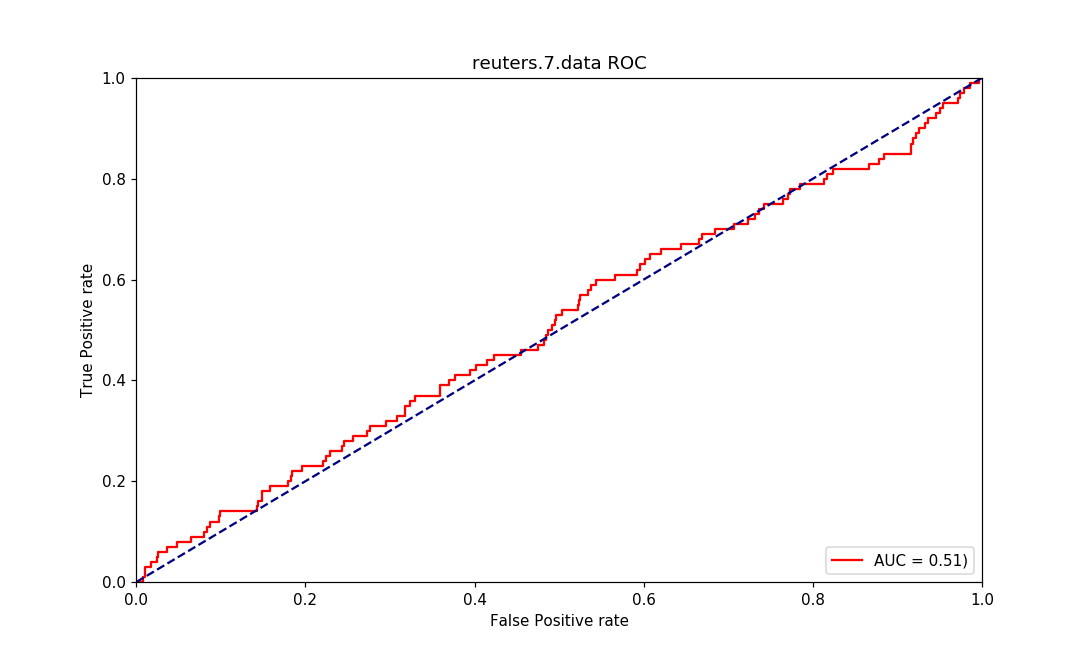

<IPython.core.display.Javascript object>


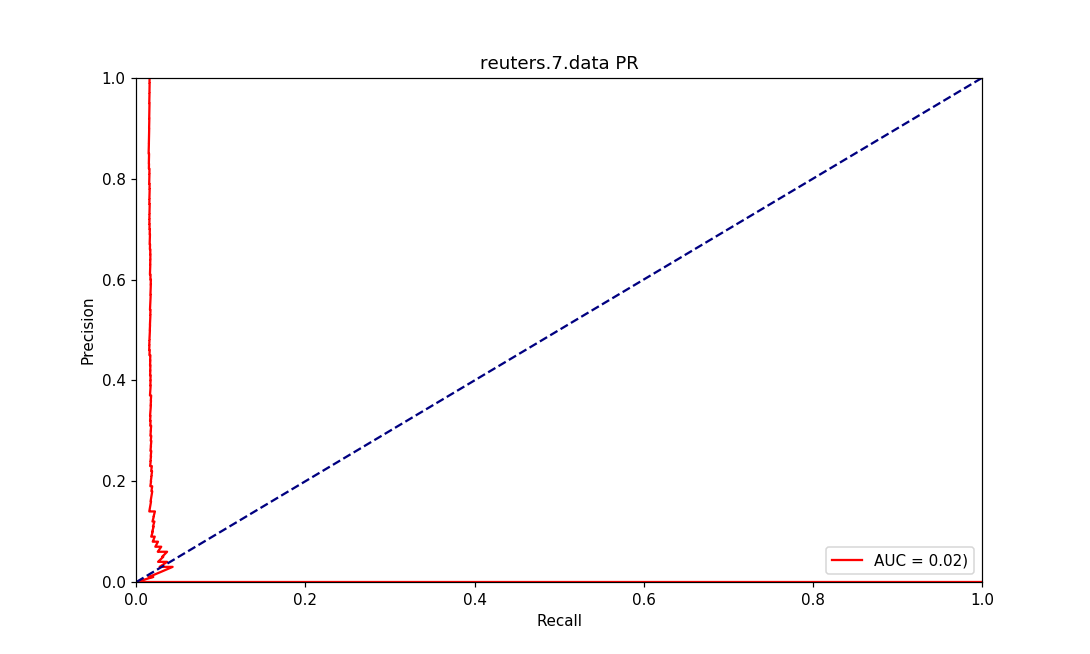

2019-10-05 18:24:04.275162 - Starting with bm/reuters/reuters.5.data
2019-10-05 18:25:07.141875 - Done preprocessing ! (6407,4659)
2019-10-05 18:25:21.996340 - Running the Matlab code
2019-10-05 18:26:22.291023 - Done, now scoring...
2019-10-05 18:26:33.521913 - Done ! Now reporting...


<IPython.core.display.Javascript object>


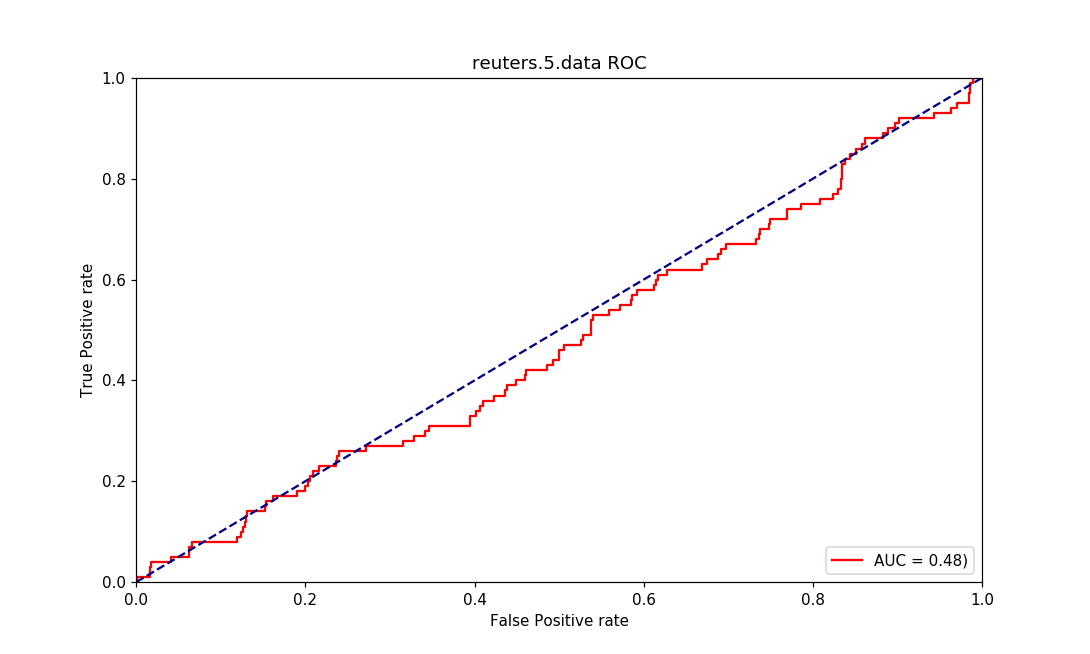

<IPython.core.display.Javascript object>


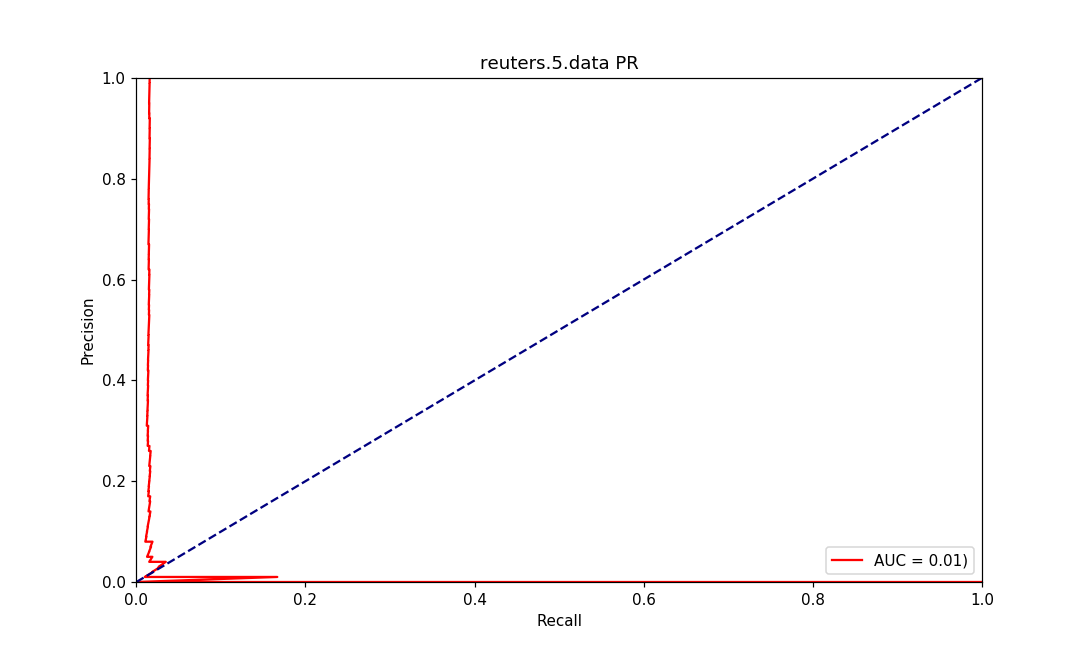

In [8]:
%matplotlib notebook

for filename in glob.glob(benchmark):
    report = open("reports/report.txt", 'a')
    towrite = []
    
    print("%s - Starting with %s"%(datetime.datetime.now(), filename))
    towrite = towrite + ["\n\n%s - Starting with %s"%(datetime.datetime.now(), filename)]
    
    labels = pd.read_csv(filename, sep="\t", header=None)  # Read the labels 
    noutliers = len(labels[labels[1] == 1])

    start = time.time()
    matrix = more_preprocess(labels) # Preprocess 
    end = time.time()
    
    print("%s - Done preprocessing ! (%s,%s)"%(datetime.datetime.now(), matrix.shape[0],matrix.shape[1]))
    
    towrite = towrite + ["Preprocessing time: %.4f seconds"%(end - start)]
    towrite = towrite + ["Ndocuments: %s, Nwords: %s, Noutliers: %s"%(labels.shape[0], matrix.shape[1], noutliers)]
    
    
    matrixfilename = "matrices/matrix.txt"
    # Let's have a look that words we have got
    cols = open("matrices/matrix_words_%s"%filename.replace(".","").split("/")[-1], "w")
    cols.write("\n".join(matrix.columns))
    cols.close()
    
    # The transpose is important, the matlab code is expecting one column per document 
    matrix.T.to_csv(matrixfilename, index=False, header=False)
    
    print("%s - Running the Matlab code"%datetime.datetime.now())
    start = time.time()
    TONMF(matrixfilename) # Call the matlab function 
    end = time.time()
    towrite = towrite + ["TONMF time: %.4f seconds"%(end - start)]
    print("%s - Done, now scoring..."%datetime.datetime.now())
    
    # Read the output Z matrice
    Z = pd.read_csv("matrices/Z.txt", header=None)
    scores = np.sqrt((Z ** 2).sum())
    
    print("%s - Done ! Now reporting..."%datetime.datetime.now())
    
    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(labels[1], scores)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, color='red', label='AUC = %0.2f)' % roc_auc)
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title('%s ROC'%filename.split("/")[-1])
    plt.legend(loc="lower right")
    plt.show()
    plt.savefig("plots/%s_ROC.pdf"%(filename.split("/")[-1]))
    
    # Plot PR curve
    fpr, tpr, thresholds = precision_recall_curve(labels[1], scores)
    pr_auc = auc(fpr, tpr, reorder=True)
    
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr, color='red', label='AUC = %0.2f)' % pr_auc)
    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('%s PR'%filename.split("/")[-1])
    plt.legend(loc="lower right")
    plt.show()
    plt.savefig("plots/%s_PR.pdf"%(filename.split("/")[-1]))
    
    towrite = towrite + ["ROC AUC: %.4f"%roc_auc]
    towrite = towrite + ["PR  AUC: %.4f"%pr_auc]
    
    sortedscores = scores.sort_values(ascending=False)

    for p in [1,2,5]:
        top = sortedscores[0:int(len(sortedscores)/100)*p]
        toplabels = [labels[1][x] for x in top.index]
        recall = sum(toplabels)/noutliers
        precision = sum(toplabels) / len(toplabels)
        towrite = towrite + ["R@%s%%: %.4f \t P@%s%%: %.4f"%(p,recall,p,precision)]
        #print("R@%s%%: %.4f \t P@%s%%: %.4f"%(p,recall,p,precision))
        
    towrite = towrite + ["%s - Ending with %s"%(datetime.datetime.now(), filename)]
    report.write("\n".join(towrite))
    report.close()